In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

train = pd.read_csv("train.csv")

In [4]:
train.shape

(891, 12)

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [36]:
df = pd.read_csv("train.csv")
from ydata_profiling import ProfileReport

In [37]:
profile = ProfileReport (df, title="Pandas Profiling Report", explorative = True)

In [41]:
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
object_variables = train.dtypes[train.dtypes == "object"].index
print(object_variables)
train[object_variables].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [64]:
del train["Name"]

In [70]:
del train["Ticket"]

In [80]:
train.rename(columns= {"SibSp":"Siblings/Spouses"}, inplace = True)

In [82]:
train.rename(columns= {"Parch":"Parents/Children"}, inplace = True)

In [104]:
duplicates_rows = train[train.duplicated()]

In [106]:
print(duplicates_rows)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, Siblings/Spouses, Parents/Children, Fare, Cabin, Embarked]
Index: []


In [108]:
train.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Sex                   0
Age                 177
Siblings/Spouses      0
Parents/Children      0
Fare                  0
Cabin               687
Embarked              2
dtype: int64

In [110]:
del train["Cabin"]

In [140]:
train["Embarked"]=train["Embarked"].fillna("S")

In [148]:
mean = np.mean(train["Age"])

In [150]:
print(mean)

29.69911764705882


In [158]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [160]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
Siblings/Spouses    0
Parents/Children    0
Fare                0
Embarked            0
dtype: int64

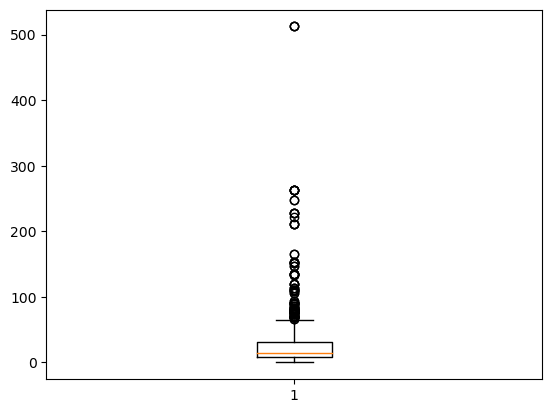

In [249]:
import matplotlib.pyplot as plt
plt.boxplot(train['Fare'])
plt.show()